# Data Visualization

In [103]:
import json 
import pprint
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
# Read the json file
f = open('2018-08-28_oed_0_CH8_structure.json')
chanel_8_data = json.load(f)

</br>

In the following data visulization, the `2018-08-28_oed_0_CH8_structure.json` subset will be used. I convert the `raw_data` dictionary in the json file into a Pandas Dataframe, so it will be easy to apply plot packages like `matplotlib` in Python.

In [105]:
# Concert the raw_data part in the json file into a dataframe
raw_data_828ch08 = chanel_8_data["raw_data"]
raw_data_828ch08_df = pd.DataFrame.from_dict(raw_data_828ch08)
raw_data_828ch08_df.head()

,data_point,test_time,date_time,step_time,step_index,cycle_index,current,voltage,charge_capacity,discharge_capacity,charge_energy,discharge_energy,_dv/dt,internal_resistance,temperature,aux_voltage,date_time_iso,time_since_cycle_start
0,0,60.003300,1.535503e+09,60.003300,0,0,0.0,3.297603,0.0,0.0,0.0,0.0,-0.000072,NaN,21.240784,NaN,2018-08-29T00:40:32+00:00,0.000000
1,1,120.000603,1.535503e+09,120.000603,0,0,0.0,3.297588,0.0,0.0,0.0,0.0,0.000010,NaN,21.269808,NaN,2018-08-29T00:42:40+00:00,2.133333
2,2,180.005402,1.535503e+09,180.005402,0,0,0.0,3.297652,0.0,0.0,0.0,0.0,0.000054,NaN,21.400776,NaN,2018-08-29T00:42:40+00:00,2.133333
3,3,240.001205,1.535503e+09,240.001205,0,0,0.0,3.297629,0.0,0.0,0.0,0.0,-0.000006,NaN,21.744606,NaN,2018-08-29T00:44:48+00:00,4.266667
4,4,300.000397,1.535503e+09,300.000397,0,0,0.0,3.297634,0.0,0.0,0.0,0.0,0.000026,NaN,22.179676,NaN,2018-08-29T00:44:48+00:00,4.266667


</br>

First, I generate a table contains some basic statistics of the dataset. 

In [106]:
raw_data_828ch08_df.describe()

,data_point,test_time,date_time,step_time,step_index,cycle_index,current,voltage,charge_capacity,discharge_capacity,charge_energy,discharge_energy,_dv/dt,internal_resistance,temperature,aux_voltage,time_since_cycle_start
count,93778.000000,93778.000000,9.377800e+04,93778.000000,93778.000000,93778.000000,93778.000000,93778.000000,93778.000000,9.377800e+04,93778.000000,9.377800e+04,93778.000000,0.0,93778.000000,0.0,93778.000000
mean,46888.500000,181484.742723,1.535685e+09,413.206062,7.762162,59.877039,0.270418,3.120391,0.836052,3.021923e-01,2.900338,9.333491e-01,0.005345,NaN,31.686096,NaN,24.964013
std,27071.521109,98056.999795,9.805683e+04,448.085001,2.553553,35.438845,4.282812,0.503337,0.364385,4.276466e-01,1.268253,1.313765e+00,0.074844,NaN,0.541686,NaN,27.807616
min,0.000000,60.003300,1.535503e+09,0.003500,0.000000,0.000000,-4.402223,1.996447,0.000000,0.000000e+00,0.000000,0.000000e+00,-0.137628,NaN,21.240784,NaN,0.000000
25%,23444.250000,96677.753906,1.535600e+09,45.677850,6.000000,29.000000,-4.399906,2.948424,0.749896,3.719363e-07,2.601454,7.757227e-07,-0.000477,NaN,31.367535,NaN,8.533333
50%,46888.500000,181311.523438,1.535684e+09,310.057297,8.000000,60.000000,0.099240,3.338818,1.058701,4.903188e-07,3.677138,1.021739e-06,-0.000008,NaN,31.784986,NaN,23.466667
75%,70332.750000,266277.468750,1.535769e+09,786.018051,10.000000,91.000000,3.573513,3.489342,1.063669,6.867413e-01,3.692843,2.157481e+00,0.000277,NaN,32.078506,NaN,36.266667
max,93777.000000,351302.406250,1.535854e+09,10800.004883,11.000000,121.000000,8.806854,3.600192,1.065092,1.544128e+00,3.701080,4.724208e+00,0.832203,NaN,32.834965,NaN,270.933333


</br>

I also generate a histogram which contains all the distributions of each feature in the dataset.

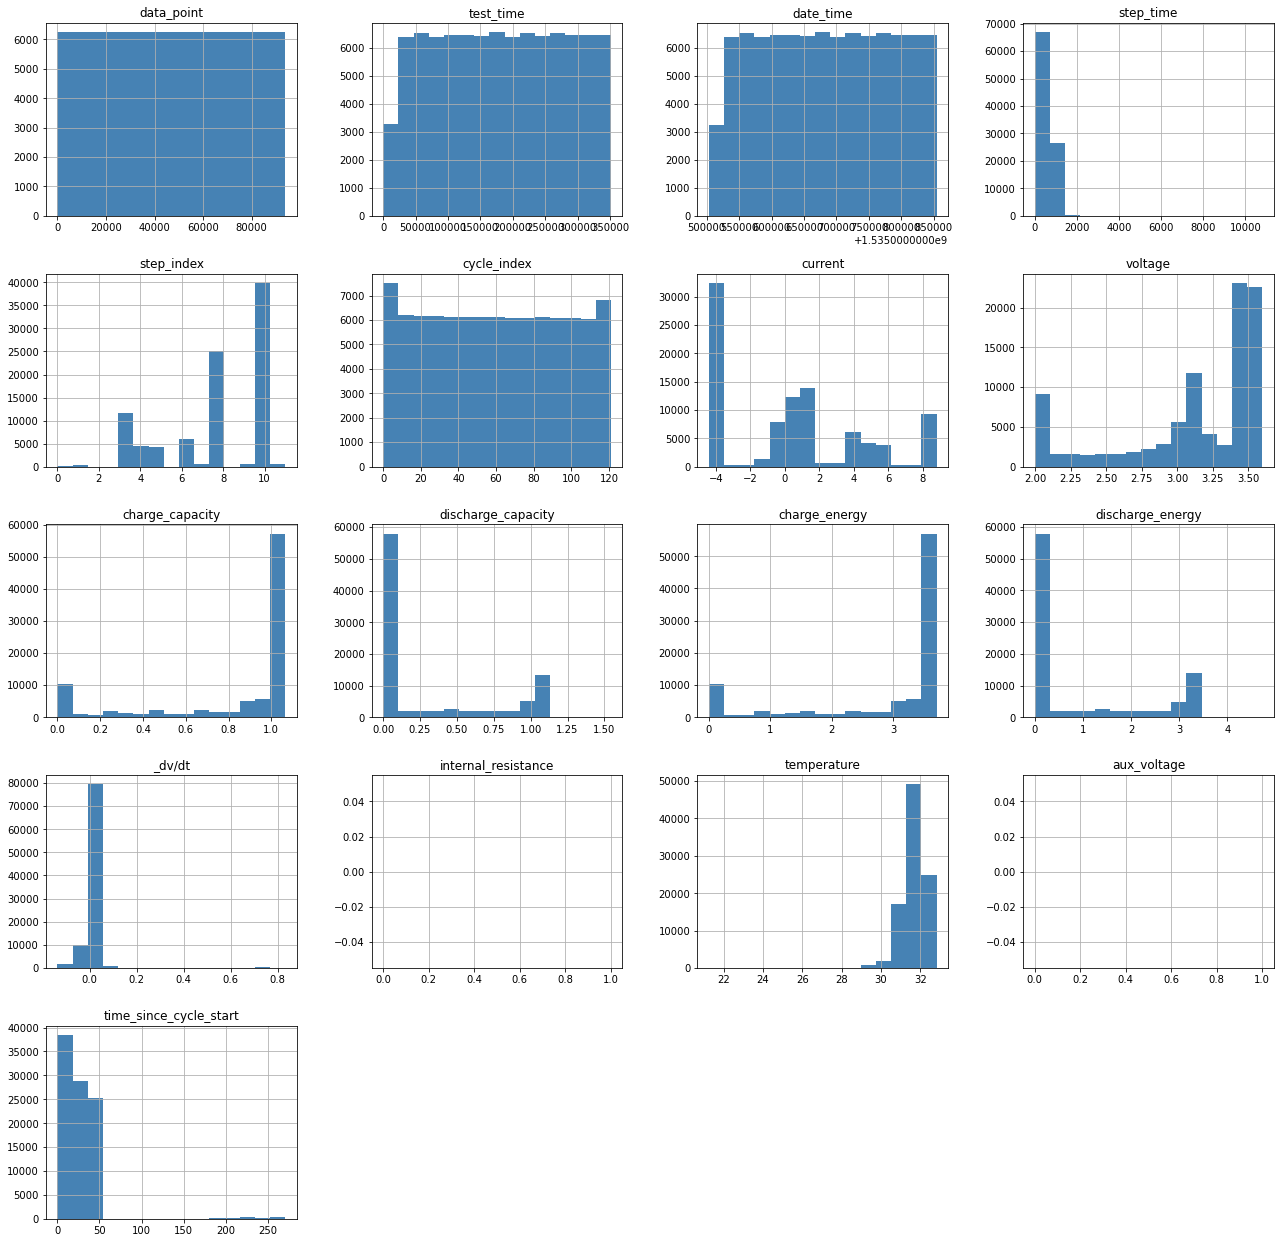

In [107]:
raw_data_828ch08_df.hist(figsize=(22, 22), bins=15, color='steelblue');

</br>

Then, I plot the curves between capacity (here in the dataset it is divided into charge and discharge capacity) and voltage, as well as the curves between capacity and temperature, to see the relationship between these features.

*It seems a little bit messy here so I can't understand the curve here. In Peter's paper, different C rate was also plotted but I'm not sure how to do it here.*

<Figure size 432x288 with 0 Axes>

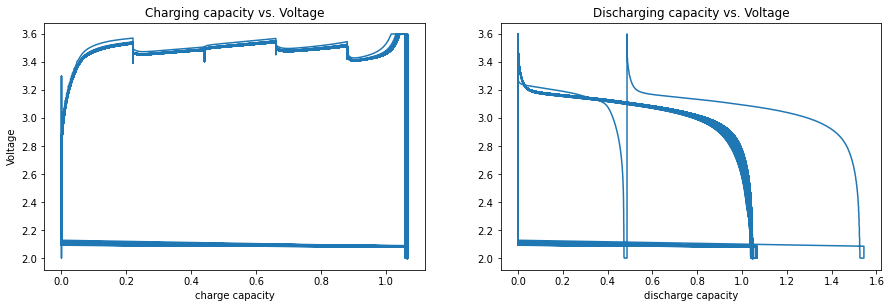

In [119]:
fig = plt.figure()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(raw_data_828ch08_df["charge_capacity"], raw_data_828ch08_df["voltage"])
plt.title("Charging capacity vs. Voltage")
plt.xlabel("charge capacity")
plt.ylabel("Voltage")

plt.subplot(2, 2, 2)
plt.plot(raw_data_828ch08_df["discharge_capacity"], raw_data_828ch08_df["voltage"])
plt.title("Discharging capacity vs. Voltage")
plt.xlabel("discharge capacity")

plt.show()

<Figure size 432x288 with 0 Axes>

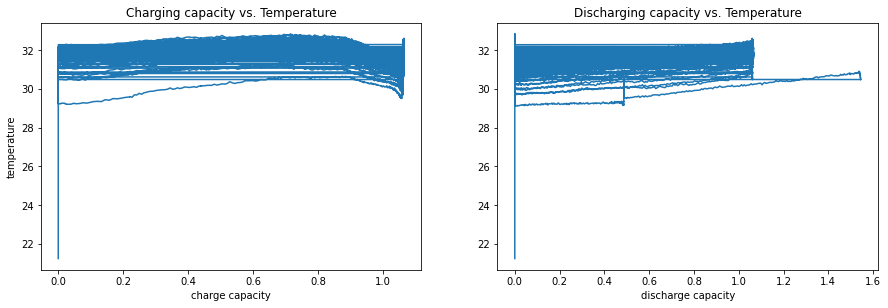

In [117]:
fig = plt.figure()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(raw_data_828ch08_df["charge_capacity"], raw_data_828ch08_df["temperature"])
plt.title("Charging capacity vs. Temperature")
plt.xlabel("charge capacity")
plt.ylabel("temperature")

plt.subplot(2, 2, 2)
plt.plot(raw_data_828ch08_df["discharge_capacity"], raw_data_828ch08_df["temperature"])
plt.title("Discharging capacity vs. Temperature")
plt.xlabel("discharge capacity")

plt.show()

</br></br>

In order to explore the dataset more, I will use another subset file in the dataset, which is `2018-09-06_oed_2_CH10_structure.json`. The same steps above will be performed on this subset.

In [110]:
# Read the json file
f = open('2018-09-06_oed_2_CH10_structure.json')
chanel_10_data = json.load(f)

In [111]:
# Concert the raw_data part in the json file into a dataframe
raw_data_906ch10 = chanel_10_data["raw_data"]
raw_data_906ch10_df = pd.DataFrame.from_dict(raw_data_906ch10)
raw_data_906ch10_df.head()

,data_point,test_time,date_time,step_time,step_index,cycle_index,current,voltage,charge_capacity,discharge_capacity,charge_energy,discharge_energy,_dv/dt,internal_resistance,temperature,aux_voltage,date_time_iso,time_since_cycle_start
0,0,1.0715,1.536195e+09,1.0144,7,87,0.0,3.465865,0.880029,4.815928e-07,3.046852,0.000001,-0.091413,NaN,32.405262,NaN,2018-09-06T00:49:04+00:00,0.0
1,1,2.0702,1.536195e+09,2.0131,7,87,0.0,3.457163,0.880029,4.815928e-07,3.046852,0.000001,-0.009076,NaN,32.405262,NaN,2018-09-06T00:49:04+00:00,0.0
2,2,3.0678,1.536195e+09,3.0107,7,87,0.0,3.450099,0.880029,4.815928e-07,3.046852,0.000001,-0.007159,NaN,32.405262,NaN,2018-09-06T00:49:04+00:00,0.0
3,3,4.0667,1.536195e+09,4.0096,7,87,0.0,3.444003,0.880029,4.815928e-07,3.046852,0.000001,-0.006281,NaN,32.405262,NaN,2018-09-06T00:49:04+00:00,0.0
4,4,5.0650,1.536195e+09,5.0079,7,87,0.0,3.438518,0.880029,4.815928e-07,3.046852,0.000001,-0.006281,NaN,32.403423,NaN,2018-09-06T00:49:04+00:00,0.0


In [112]:
raw_data_906ch10_df.describe()

,data_point,test_time,date_time,step_time,step_index,cycle_index,current,voltage,charge_capacity,discharge_capacity,charge_energy,discharge_energy,_dv/dt,internal_resistance,temperature,aux_voltage,time_since_cycle_start
count,112712.000000,112712.000000,1.127120e+05,112712.000000,112712.000000,112712.000000,112712.000000,112712.000000,112712.000000,1.127120e+05,112712.000000,112712.000000,112712.000000,0.0,112712.000000,0.0,112712.000000
mean,56355.500000,213329.947857,1.536408e+09,380.863825,7.670567,68.360246,-0.023705,3.118069,0.815963,2.955665e-01,2.820317,0.916093,0.001770,NaN,32.110847,NaN,1142.196740
std,32537.296108,119837.580410,1.198374e+05,421.665046,2.599421,36.177077,3.825541,0.482667,0.378801,4.225670e-01,1.317091,1.302970,0.055464,NaN,0.347306,NaN,2195.772736
min,0.000000,1.071500,1.536195e+09,0.003800,0.000000,0.000000,-4.402805,1.995484,0.000000,0.000000e+00,0.000000,0.000000,-0.135346,NaN,26.811619,NaN,0.000000
25%,28177.750000,117570.896484,1.536312e+09,40.513674,6.000000,37.000000,-4.400049,2.932074,0.660060,5.538218e-07,2.272901,0.000001,-0.000504,NaN,31.994291,NaN,10.666667
50%,56355.500000,217135.710938,1.536412e+09,264.208649,8.000000,75.000000,0.110562,3.268515,1.057881,7.226458e-07,3.663924,0.000002,-0.000012,NaN,32.156078,NaN,27.733333
75%,84533.250000,316118.976562,1.536511e+09,722.143250,10.000000,100.000000,4.398956,3.495125,1.063343,6.535302e-01,3.681239,2.057754,0.000330,NaN,32.309937,NaN,40.533333
max,112711.000000,415634.468750,1.536611e+09,10800.006836,12.000000,121.000000,6.609600,3.600213,1.066348,1.549998e+00,3.692660,4.750216,0.700318,NaN,35.499081,NaN,5489.066667


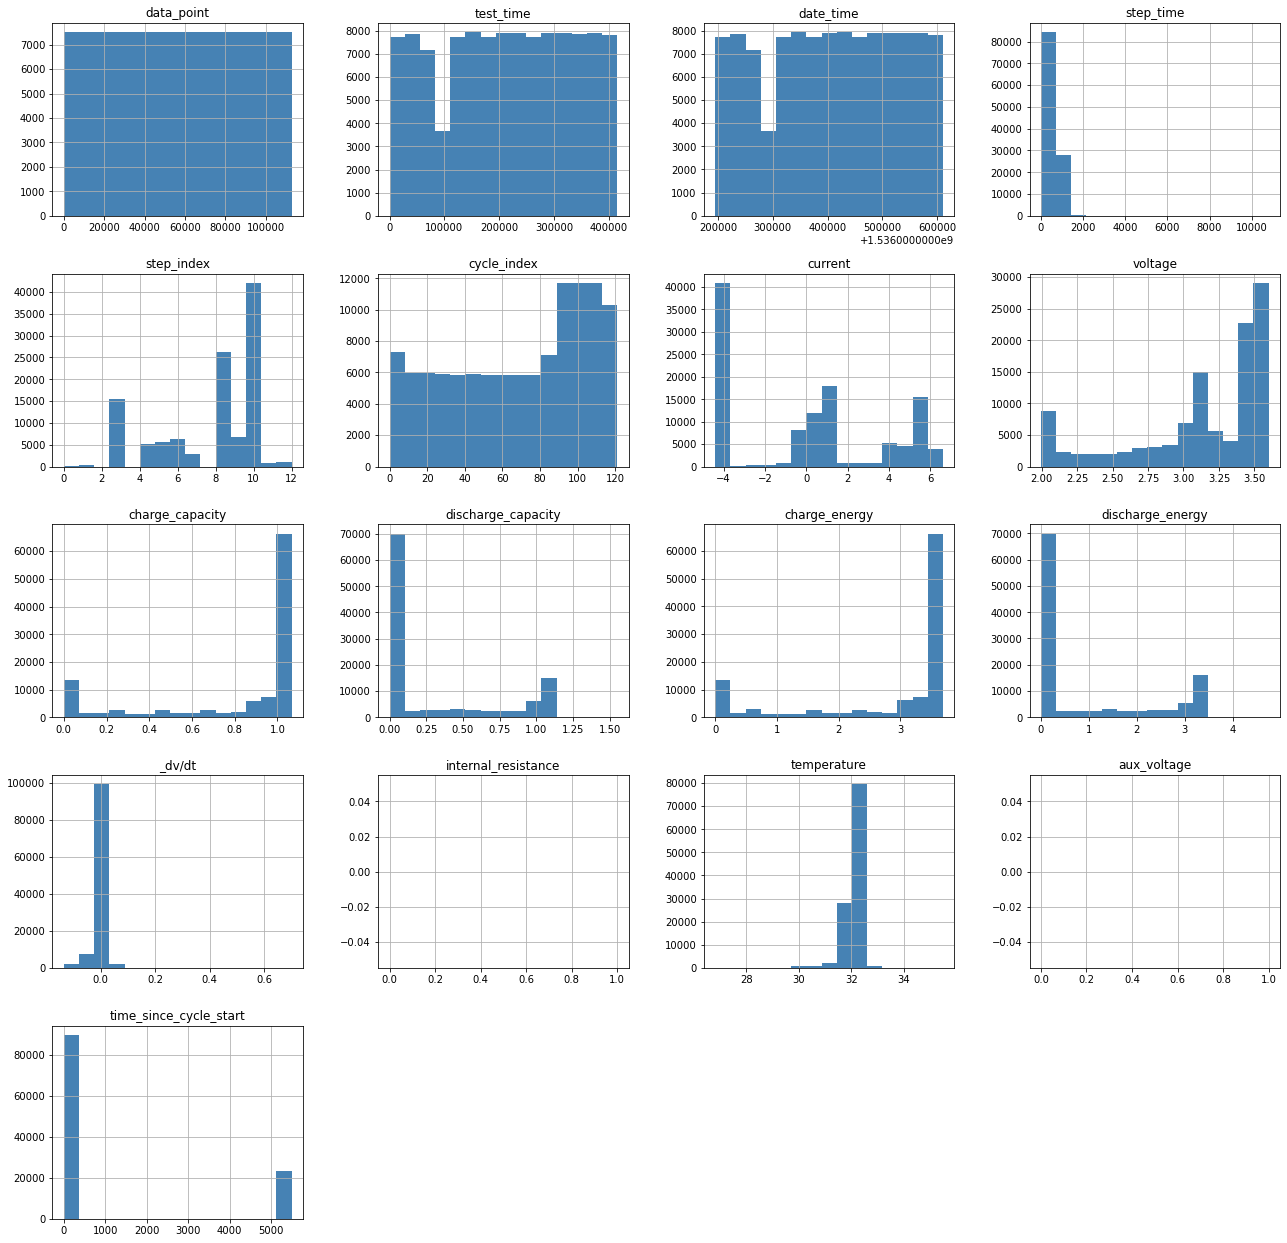

In [113]:
raw_data_906ch10_df.hist(figsize=(22, 22), bins=15, color='steelblue');

<Figure size 432x288 with 0 Axes>

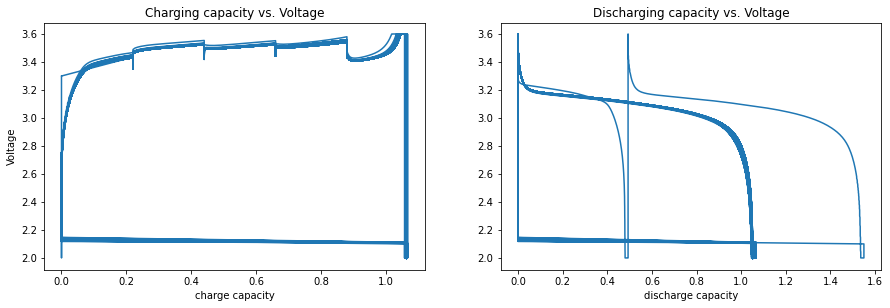

In [120]:
fig = plt.figure()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(raw_data_906ch10_df["charge_capacity"], raw_data_906ch10_df["voltage"])
plt.title("Charging capacity vs. Voltage")
plt.xlabel("charge capacity")
plt.ylabel("Voltage")

plt.subplot(2, 2, 2)
plt.plot(raw_data_906ch10_df["discharge_capacity"], raw_data_906ch10_df["voltage"])
plt.title("Discharging capacity vs. Voltage")
plt.xlabel("discharge capacity")

plt.show()

<Figure size 432x288 with 0 Axes>

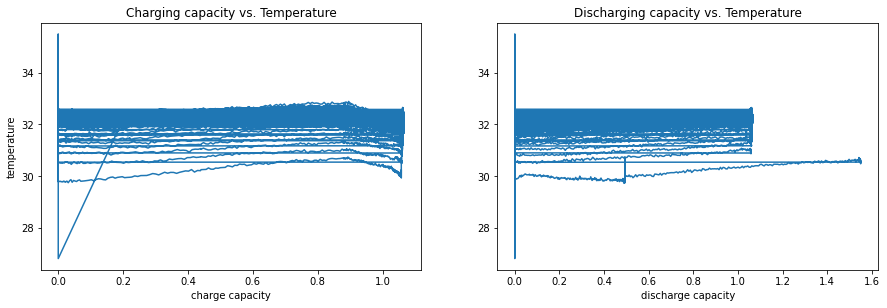

In [122]:
fig = plt.figure()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(raw_data_906ch10_df["charge_capacity"], raw_data_906ch10_df["temperature"])
plt.title("Charging capacity vs. Temperature")
plt.xlabel("charge capacity")
plt.ylabel("temperature")

plt.subplot(2, 2, 2)
plt.plot(raw_data_906ch10_df["discharge_capacity"], raw_data_906ch10_df["temperature"])
plt.title("Discharging capacity vs. Temperature")
plt.xlabel("discharge capacity")

plt.show()